## Ejercicio: 
### Generar estadisticas a partir de datos de vientos

1. Los datos tienen la siguiente estructura:

` 61  1  1 15.04 14.96 13.17  9.29 13.96  9.87 13.67 10.25 10.83 12.58 18.50 15.04`<br>
` 61  1  2 14.71 16.88 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83`<br>
` 61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25  8.04  8.50  7.67 12.75 12.71`<br>

Las primeras 3 columnas son año, mes y dia. El resto de las 12 columnas son velociades de viento promediades en nodos en 12 distintos puntos en Irlanda en ese momento.

El archivo que contiene nuestro datos esta en: `wind.data`

Locaciones: RPT, VAL, ROS, KIL, SHA, BIR, DUB, CLA, MUL, CLO, BEL, MAL

In [256]:
%cat data/wind.desc

wind   daily average wind speeds for 1961-1978 at 12 synoptic meteorological 
       stations in the Republic of Ireland (Haslett and raftery 1989).

These data were analyzed in detail in the following article:
   Haslett, J. and Raftery, A. E. (1989). Space-time Modelling with
   Long-memory Dependence: Assessing Ireland's Wind Power Resource
   (with Discussion). Applied Statistics 38, 1-50.

Each line corresponds to one day of data in the following format:
year, month, day, average wind speed at each of the stations in the order given
in Fig.4 of Haslett and Raftery : 
 RPT, VAL, ROS, KIL, SHA, BIR, DUB, CLA, MUL, CLO, BEL, MAL

Fortan format : ( i2, 2i3, 12f6.2) 

The data are in knots, not in m/s.

Permission granted for unlimited distribution.

Please report all anomalies to fraley@stat.washington.edu

Be aware that the dataset is 532494 bytes long (thats over half a
Megabyte).  Please be sure you want the data before you request it.


In [197]:
# importamos numpy con la convencion
import numpy as np

locations = ["RPT", "VAL", "ROS", "KIL", "SHA", "BIR", "DUB", "CLA", "MUL", "CLO", "BEL", "MAL"]

data_raw = np.loadtxt('data/wind.data')
# Vista a datos de vientos, no incluyendo las primeras 3 columnas de fecha
wind_data = data_raw[:,3:]

In [198]:
wind_data[0]

array([ 15.04,  14.96,  13.17,   9.29,  13.96,   9.87,  13.67,  10.25,
        10.83,  12.58,  18.5 ,  15.04])

### Estadisticas sobre todos los valores de la matriz

In [199]:
wind_data.min()

0.0

In [200]:
wind_data.max()

42.539999999999999

In [201]:
wind_data.mean()

10.22837377040868

In [202]:
wind_data.std()

5.6038401810957934

### Generar estadisticas de todos los dias de datos para cada locación

In [213]:
wdmax = wind_data.max(axis=0)

In [214]:
wdmin = wind_data.min(axis=0)

In [215]:
wdmean = wind_data.mean(axis=0)

In [216]:
wdstd= wind_data.std(axis=0)

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline

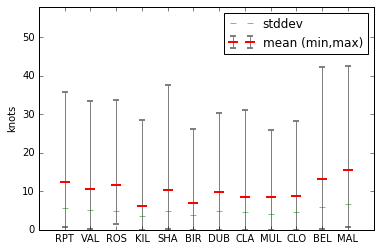

In [370]:
x = np.linspace(1,12,12)

plt.xticks(btm,locations)
plt.errorbar(x , wdmean, yerr=[ wdmean-wdmin, wdmax-wdmean ] , 
             fmt='_r' , ecolor='gray' , markeredgewidth=2 , markersize=10 , label='mean (min,max)' )

plt.plot(x,wdstd,'_g', label='stddev')

plt.ylim([0,58])
plt.xlim([0,13])

plt.ylabel('knots')
plt.legend(loc='upper right')

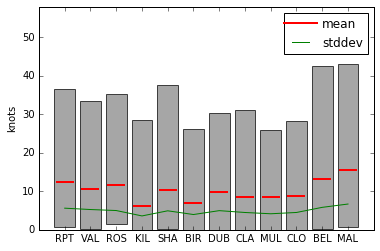

In [219]:
x = np.linspace(1,12,12)

plt.xticks(btm,locations)
plt.bar(x,wdmax,align='center',bottom=wdmin, color='gray', alpha=0.7)
plt.plot(x,wdmean,'_r',markersize=18, markeredgewidth=2,label="mean")
plt.plot(x,wdstd,'g', label='stddev')

plt.ylim([0,58])
plt.xlim([0,13])

plt.ylabel('knots')
plt.legend(loc='upper right')

### Generar estadisticas de sobre todas las posiciones para cada dia.

In [377]:
# Las mismas operaciones, aplicandola sobre el eje de los renglones o segunda dimensión
wind_data.min(axis=1)

array([ 9.29,  6.5 ,  6.17, ...,  8.71,  9.13,  9.59])

In [380]:
wind_data.mean(axis=1)

array([ 13.09666667,  11.79833333,  11.34166667, ...,  14.89      ,
        15.3675    ,  15.4025    ])

### Posiciones que tuvieron los maximos diarios

In [384]:
# Los valores maximos, sobre renglones
wind_data.max(axis=1)
# Los indices, que contienen los valores maximos 
wind_data.argmax(axis=1)

array([10, 10,  0, ..., 11, 11,  2])

### Obtener la fecha que tuvo la lectura maxima

In [388]:
# Diarios maximos para cada dia (sobre renglones) todas las posiciones
days_max = wind_data.max(axis=1)

# Indice del dia con valor maximo 
max_row = days_max.argmax()

42.539999999999999

In [389]:
# Fecha del dia con valor maximo
print ("19%d - %02d - %02d" %  
       ( int(data_raw[max_row, 0]) , int(data_raw[max_row, 1]) , int(data_raw[max_row, 2]) ) )
print ("Con valor maximo: %f" % days_max.max())

1966 - 12 - 02
Con valor maximo: 42.540000


### Estadisticas de mayo

In [262]:
may_indices = data_raw[:,1] == 5
may_indices.size

6574

In [192]:
may_data = wind_data[may_indices]
may_data.shape

(558, 12)

In [244]:
# Definir funcion para graficar una serie

def plotstats(serie, title):
    x = np.linspace(1,serie.shape[1],serie.shape[1])

    plt.xticks(btm,locations)
    plt.errorbar(x , serie.mean(axis=0), 
                 yerr=[ serie.mean(axis=0)-serie.min(axis=0), serie.max(axis=0)-serie.mean(axis=0) ] , 
                 fmt='_r' , ecolor='gray' , markeredgewidth=2 , markersize=15 , label='mean (min,max)' )

    plt.plot(x,serie.std(axis=0),'_g', label='stddev')

    plt.ylim([0,58])
    plt.xlim([0,13])

    plt.title(title)
    plt.ylabel('knots')
    plt.legend(loc='upper right')    

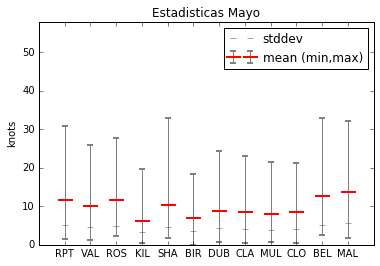

In [254]:
plotstats(may_data, 'Estadisticas Mayo')

### Estadisticas por mes

In [362]:
month_group = {'min' : np.zeros(12) , 'max' : np.zeros(12) , 
               'mean' : np.zeros(12), 'std' : np.zeros(12) } 

for m in range(12): 
    wind_data_bymonth = wind_data[data_raw[:,1] == (m+1)]
    month_group['min'][m] = wind_data_bymonth.min() 
    month_group['max'][m] = wind_data_bymonth.max() 
    month_group['mean'][m] = wind_data_bymonth.mean() 
    month_group['std'][m] = wind_data_bymonth.std()     


In [365]:
import datetime as dt
xticksmonths = [ dt.datetime(1900,m+1,1).strftime('%b') for m in range(12)]

xticksmonths

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

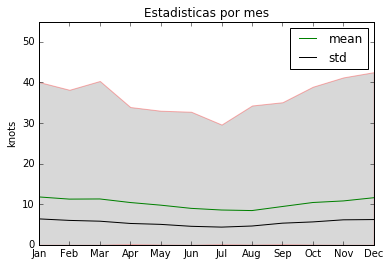

In [369]:
x = np.arange(12)
plt.plot(x, month_group['mean'] , '-g', label='mean' , )    

plt.fill_between(x , month_group['min'] , month_group['max'], color='gray', alpha=0.3, edgecolor='red') 
plt.plot(x, month_group['std'], '-k' ,label='std')  

  
plt.xticks(x,xticksmonths)
plt.ylabel('knots')
plt.legend()
plt.xlim([0,11])
plt.ylim([0,55])

plt.title('Estadisticas por mes')

In [423]:
import datetime as dt

startd = dt.datetime(int(data_raw[0,0]),
                     int(data_raw[0,1]), 
                     int(data_raw[0,2]))        

endd = dt.datetime(int(data_raw[-1,0]),
                   int(data_raw[-1,1]), 
                   int(data_raw[-1,2])) 

tdelt = (endd-startd)
tdelt

datetime.timedelta(6573)

In [456]:
tdelt.days / 365
int(np.ceil(len(data_raw)/365))

19

In [465]:
# Nueva columna yeardays, conteniendo en numero de dia del año que corresponde para cada observación

yd = np.arange(1,366)
colyeardays = np.tile(yd, int(np.ceil(len(data_raw)/365)))[0:len(data_raw)]

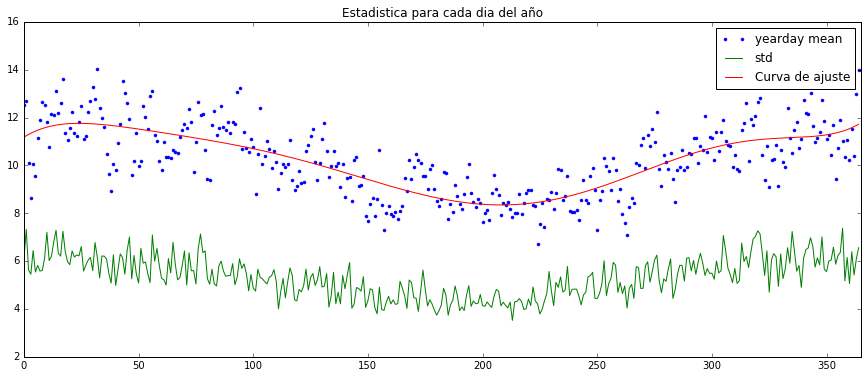

In [547]:
dailywdt_mean = np.empty(365)
dailywdt_max = np.empty(365)
dailywdt_min = np.empty(365)
dailywdt_std = np.empty(365)

for d in range(1,366):
    dailywdt_mean[d-1] = wind_data[np.where(colyeardays==d)].mean()
    dailywdt_max[d-1] = wind_data[np.where(colyeardays==d)].max()
    dailywdt_min[d-1] = wind_data[np.where(colyeardays==d)].min()
    dailywdt_std[d-1] = wind_data[np.where(colyeardays==d)].std()

    
plt.figure(figsize=(15,6))    
plt.plot(dailywdt_mean,'.',label='yearday mean')
#plt.plot(dailywdt_min)
#plt.plot(dailywdt_max)
plt.plot(dailywdt_std,label='std')

plys = np.polyfit(np.arange(365),dailywdt_mean,8)
mfit = np.poly1d(plys)
plt.plot(np.arange(365),mfit(np.arange(365)), label='Curva de ajuste')
plt.xlim([0,365])
plt.legend()
plt.title("Estadistica para cada dia del año")

In [253]:
data_raw[:,1] 

array([  1.,   1.,   1., ...,  12.,  12.,  12.])

In [391]:
meses = (data_raw[:,0] - 61) * 12 + data_raw[:,1] - 1 
meses

array([   0.,    0.,    0., ...,  215.,  215.,  215.])

In [396]:
valoresmeses = np.unique(meses)
valoresmeses


array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
        108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,
        117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,
        126.,  127.,

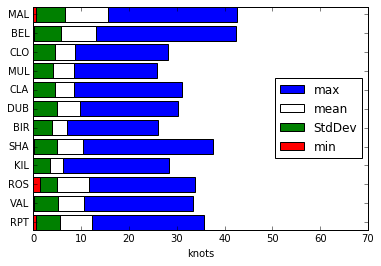

In [78]:
btm = np.linspace(1,12,12)
plt.barh(btm,wdmax,tick_label=locations, align='center', label="max")
plt.barh(btm,wdmean,color='w',align='center',label="mean")
plt.barh(btm,wdstd,color='g',align='center', label="StdDev")
plt.barh(btm,wdmin,color='r',align='center', label="min")
plt.xlim([0,70])
plt.xlabel('knots')
plt.legend(loc='center right')

In [80]:
# Indice con la velocidad de viento mas alta.

In [81]:
# A que fecha corresponde

In [82]:
# estadisticas de solo Febrero

In [1]:
ls

Comenzando con python para computo científico.ipynb*  numpyBasicsResume.ipynb*
datos.mat*                                            PythonBasics.ipynb*
Ejercicio-SciPy-Estadisticas-Viento.ipynb             TablaEquivalencias.ipynb*
misesion.npz                                          Untitled.ipynb
netCDFMatplotlib.ipynb*                               wind.data
numpyBasics.ipynb*                                    wind.desc


In [2]:
%cat wind.desc

wind   daily average wind speeds for 1961-1978 at 12 synoptic meteorological 
       stations in the Republic of Ireland (Haslett and raftery 1989).

These data were analyzed in detail in the following article:
   Haslett, J. and Raftery, A. E. (1989). Space-time Modelling with
   Long-memory Dependence: Assessing Ireland's Wind Power Resource
   (with Discussion). Applied Statistics 38, 1-50.

Each line corresponds to one day of data in the following format:
year, month, day, average wind speed at each of the stations in the order given
in Fig.4 of Haslett and Raftery : 
 RPT, VAL, ROS, KIL, SHA, BIR, DUB, CLA, MUL, CLO, BEL, MAL

Fortan format : ( i2, 2i3, 12f6.2) 

The data are in knots, not in m/s.

Permission granted for unlimited distribution.

Please report all anomalies to fraley@stat.washington.edu

Be aware that the dataset is 532494 bytes long (thats over half a
Megabyte).  Please be sure you want the data before you request it.
